<a href="https://colab.research.google.com/github/reb-scho/subsidies/blob/main/subsidies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory analysis of the IEA Fossil Fuel Subsidies Database



To reduce enery prices, governments may subsidise fossil fuels (coal, oil, natural gas) and electricity generated by fossil fuels.

In the [Fossil Fuel Subsidies Database](https://www.iea.org/data-and-statistics/data-product/fossil-fuel-subsidies-database#), "the IEA estimates subsidies to fossil fuels that are consumed directly by end-users or consumed as inputs to electricity generation." The data currently covers 2010-2023.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

!pip install -U plotly
import plotly.express as px
from IPython.display import Image, display
import os

!apt-get update
!apt-get install -y chromium-browser
!pip install -U kaleido
import kaleido
kaleido.get_chrome()

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/colab/subsidies/data/subsidies_raw.xlsx'
from google.colab import files

!wget https://raw.githubusercontent.com/reb-scho/subsidies/main/cleaning_data.py
from cleaning_data import load_and_clean

global_product_df, global_total_df, country_product_df, country_total_df = load_and_clean(file_path)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,937 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Pa

/tmp/ipython-input-1313839765.py:16: RuntimeWarning:

coroutine 'get_chrome' was never awaited



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2025-08-16 17:33:16--  https://raw.githubusercontent.com/reb-scho/subsidies/main/cleaning_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3534 (3.5K) [text/plain]
Saving to: ‘cleaning_data.py.6’

cleaning_data.py.6  100%[===================>]   3.45K  --.-KB/s    in 0s      

2025-08-16 17:33:16 (30.4 MB/s) - ‘cleaning_data.py.6’ saved [3534/3534]



Dataframes:
* global_product_df
* global_elec_df
* global_fossil_df
* global_fossil_agg_df

# 1. What are the global trends in fossil fuel subsidies, 2010-2023?

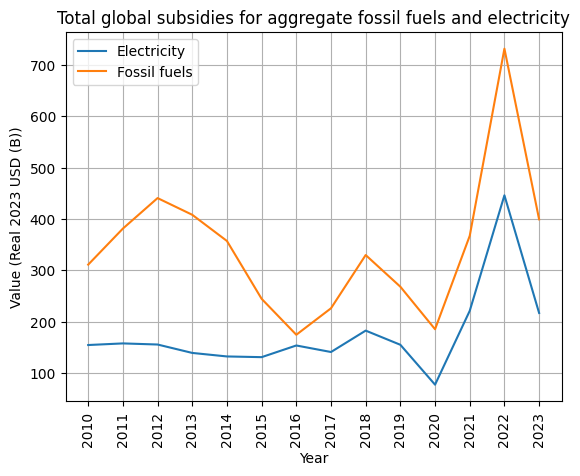

In [13]:
global_elec_df = global_product_df[global_product_df["Product"] == "Electricity"].copy()
global_fossil_df = global_product_df[global_product_df["Product"] != "Electricity"].copy()
global_fossil_agg_df = global_fossil_df.groupby("Year")["Value (B USD)"].sum().reset_index()

plt.plot(global_elec_df["Year"], global_elec_df["Value (B USD)"], label = "Electricity")
plt.plot(global_fossil_agg_df["Year"], global_fossil_agg_df["Value (B USD)"], label = "Fossil fuels")

plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Value (Real 2023 USD (B))")
plt.title("Total global subsidies for aggregate fossil fuels and electricity")
plt.grid()
plt.legend()
plt.show()


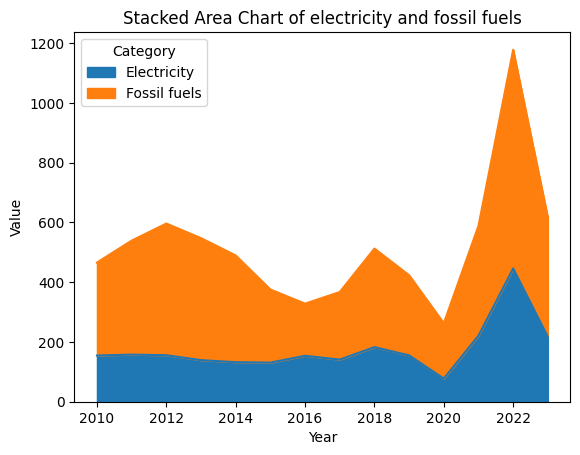

In [14]:
global_fossil_agg_df["Product"] = "Fossil fuels"
df_concat = pd.concat([global_fossil_agg_df, global_elec_df])
df_wide = df_concat.pivot(index="Year", columns="Product", values="Value (B USD)")
df_wide.plot.area(stacked=True)  # stacked=True is default, but explicit is clearer

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Stacked Area Chart of electricity and fossil fuels")
plt.legend(title="Category", loc="upper left")  # adjust location as needed
plt.show()

Line chart showing total subsidies for individual fossil fuels and electricity each year:

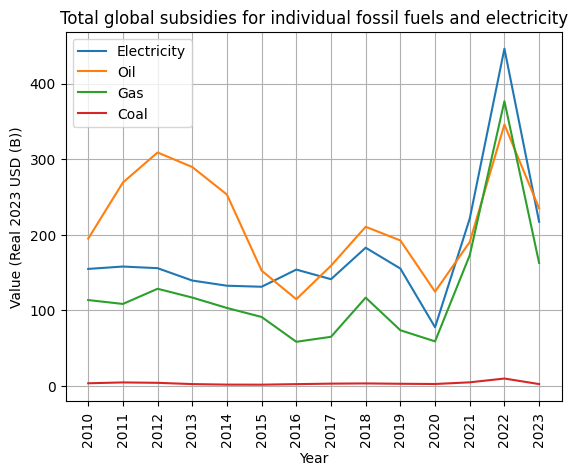

In [15]:
plt.plot(global_elec_df["Year"], global_elec_df["Value (B USD)"], label = "Electricity")

for product in global_fossil_df["Product"].unique():
  plot_df = global_fossil_df[global_fossil_df['Product'] == product]
  plt.plot(plot_df['Year'], plot_df['Value (B USD)'], label=product)

plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Value (Real 2023 USD (B))")
plt.title("Total global subsidies for individual fossil fuels and electricity")
plt.grid()
plt.legend()
plt.show()

**Analysis**
Note dip in demand in 2020, associated with COVID and government stimulus.
Note surge in demand in 2022, associated with global energy crisis following Russia's invasion of Ukraine.

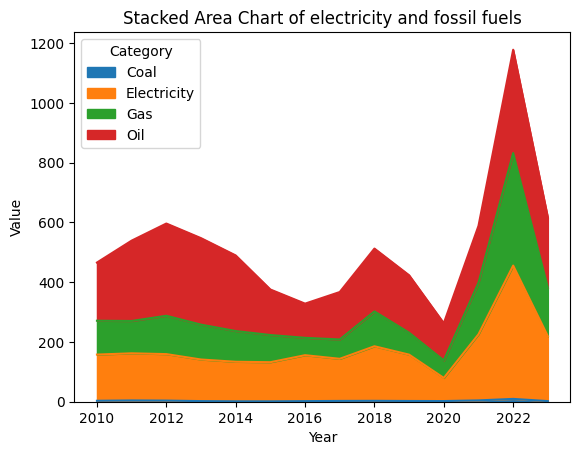

In [16]:
df_wide = global_product_df.pivot(index="Year", columns="Product", values="Value (B USD)")

df_wide.plot.area(stacked=True)  # stacked=True is default, but explicit is clearer

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Stacked Area Chart of electricity and fossil fuels")
plt.legend(title="Category", loc="upper left")  # adjust location as needed
plt.show()

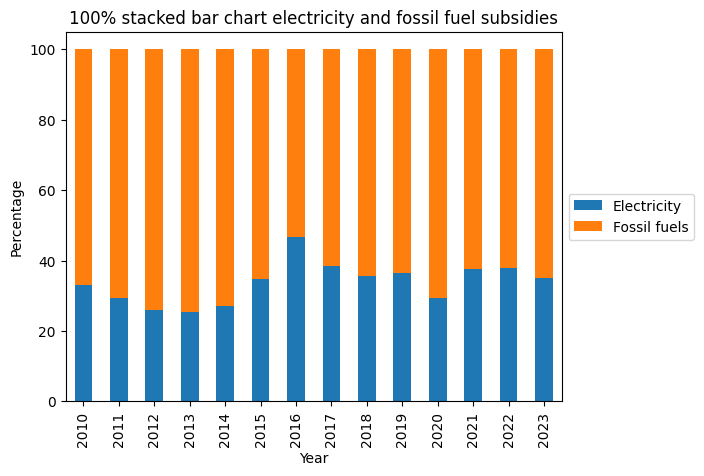

In [17]:
global_fossil_agg_df = global_fossil_agg_df[["Product", "Year", "Value (B USD)"]]

df_concat = pd.concat([global_fossil_agg_df, global_elec_df])
df_wide = df_concat.pivot(index="Year", columns="Product", values="Value (B USD)")
df_norm = df_wide.div(df_wide.sum(axis=1), axis=0) * 100

df_norm.plot.bar(stacked=True)
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("100% stacked bar chart electricity and fossil fuel subsidies")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

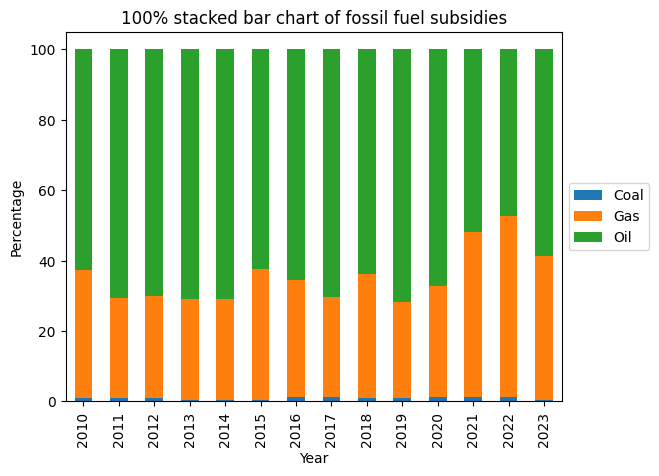

In [18]:
df_wide = global_fossil_df.pivot(index="Year", columns="Product", values="Value (B USD)")
df_norm = df_wide.div(df_wide.sum(axis=1), axis=0) * 100
df_norm.plot.bar(stacked=True)
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("100% stacked bar chart of fossil fuel subsidies")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

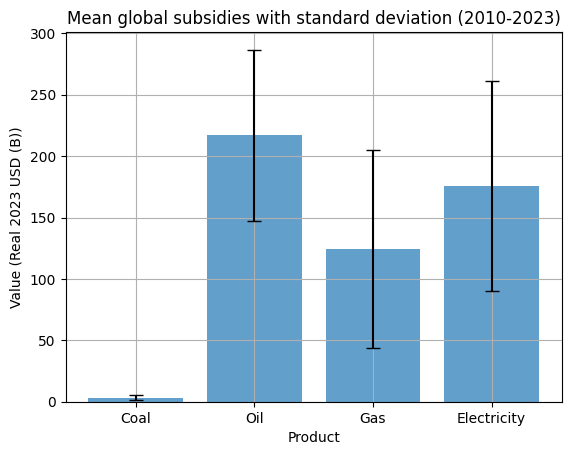

In [19]:
order = ["Coal", "Oil", "Gas", "Electricity"]

means = global_product_df.groupby("Product")["Value (B USD)"].mean().reindex(order)
stds = global_product_df.groupby("Product")["Value (B USD)"].std().reindex(order)

plt.bar(means.index, means.values, yerr=stds.values, capsize=5, alpha=0.7)
plt.xlabel("Product")
plt.ylabel("Value (Real 2023 USD (B))")
plt.title("Mean global subsidies with standard deviation (2010-2023)")
plt.grid()
plt.show()

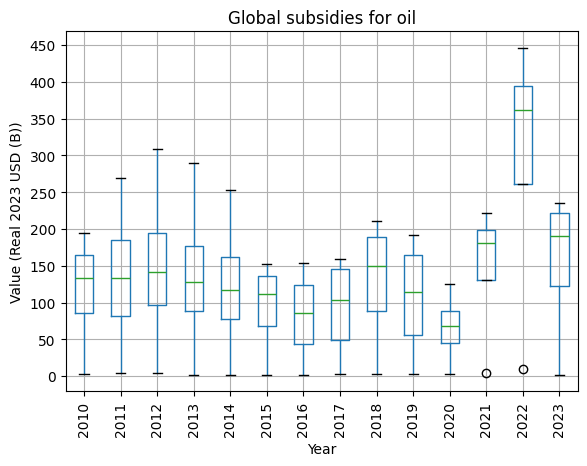

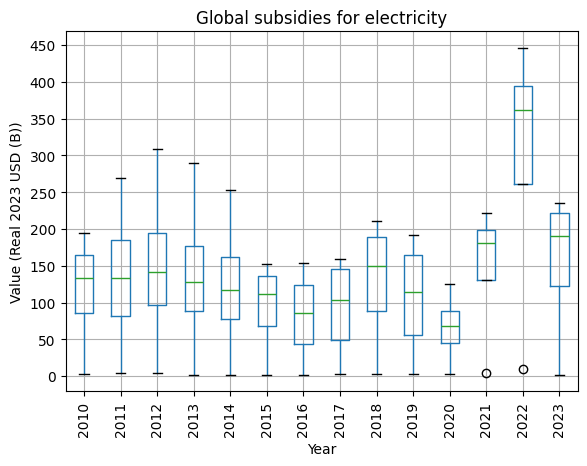

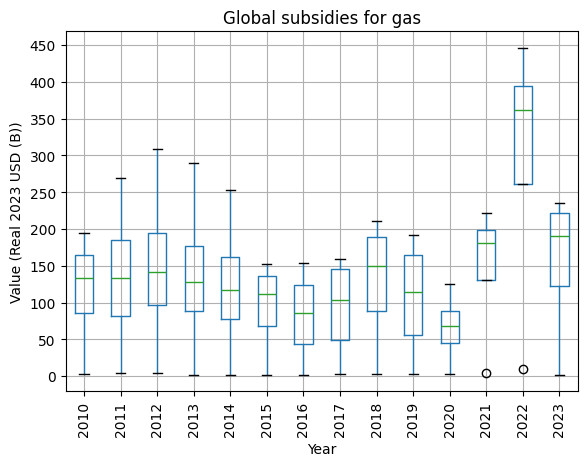

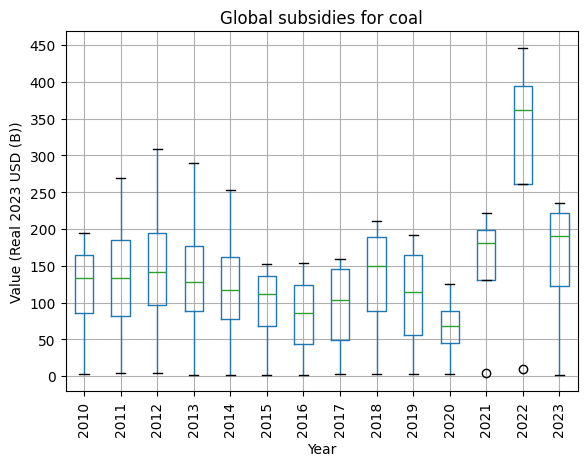

In [20]:
for prod in global_product_df["Product"].unique():
  global_product_df.boxplot(column="Value (B USD)", by="Year")
  max_val = global_product_df["Value (B USD)"].max()
  plt.xticks(rotation=90)
  plt.yticks(np.arange(0, max_val + 50, 50))
  plt.title(f"Global subsidies for {prod.lower()}")
  plt.suptitle("")
  plt.xlabel("Year")
  plt.ylabel("Value (Real 2023 USD (B))")
  plt.show()

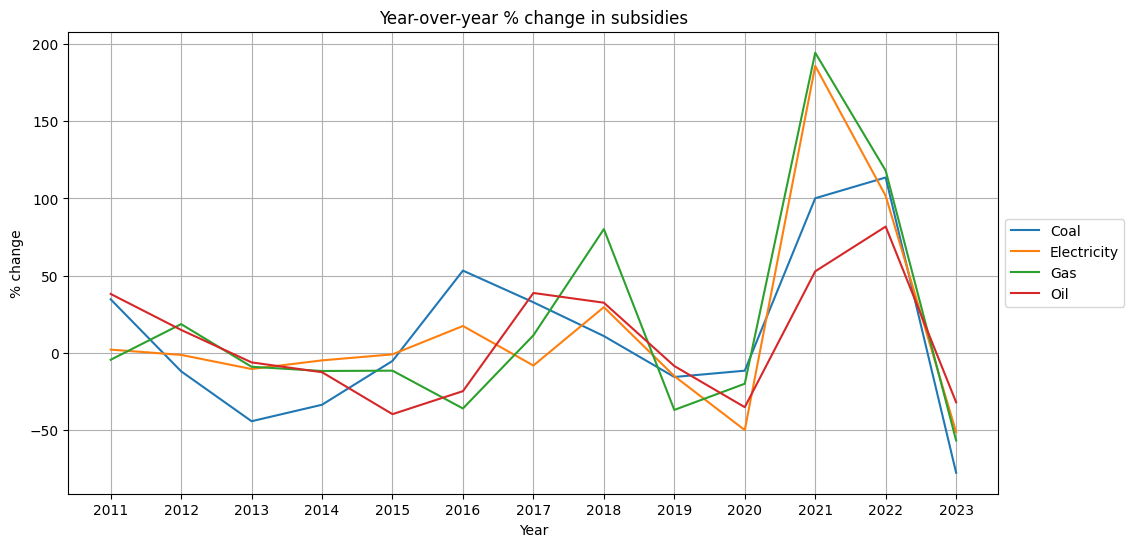

In [21]:
#% change

df_sorted = global_product_df.sort_values(["Product","Year"])
df_sorted["% change"] = df_sorted.groupby("Product")["Value (B USD)"].pct_change() * 100

plt.figure(figsize=(12,6))

for prod in df_sorted["Product"].unique():
  plot_df = df_sorted[df_sorted["Product"] == prod]
  plt.plot(plot_df["Year"], plot_df["% change"], label = prod)

plt.xlabel("Year")
plt.ylabel("% change")
plt.title("Year-over-year % change in subsidies")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# 2. What are the national trends in fossil fuel subsidies, 2010-2023?

To plot:

* Chloropleth map (logorithmic; total and for individual products?)
* Grouped bar chart with countries on x-axis, bars grouped by product (for entire period) AND/OR stacked bar chart with countries on the x-axis, stacked by product
* Boxplots (5) showing e.g. distribution of top 10 countries for each product, with countries on x-axis, subsidies on y-axis (less important?)
* Line chart with % change per country (maybe for top 10 countries overall)

In [23]:
data = country_product_df.groupby("Country", as_index=False)["Value (B USD)"].sum()

fig = px.choropleth(
    data,
    locations="Country",
    locationmode="country names",
    color="Value (B USD)",
    color_continuous_scale="Reds",
    hover_name="Country",
    title="Total fossil fuel and electricity subsidies by country"
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

html_filename = "choropleth.html"
fig.write_html(html_filename)

png_filename = "choropleth.png"
display(Markdown(f"[View interactive choropleth.]({html_filename})"))


/tmp/ipython-input-1939472663.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



[View interactive choropleth](choropleth.html)